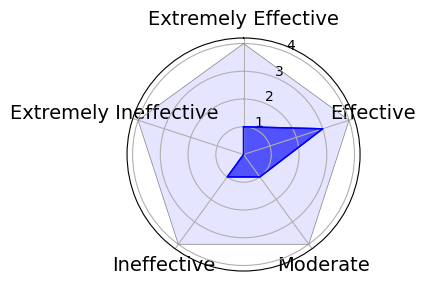

In [7]:
import matplotlib.pyplot as plt
import numpy as np

font_size = 14

# Data for radar charts
categories_1 = ['Extremely Effective', 'Effective', 'Moderate', 'Ineffective', 'Extremely Ineffective']
values_1 = np.array([1, 3, 1, 1, 0])
values_1 = np.concatenate((values_1,[values_1[0]]))

categories_2 = ['Future Trend', 'Neutral', 'Not a Trend']
values_2 = np.array([26, 15, 13])
values_2 = np.concatenate((values_2,[values_2[0]]))

# Number of variables for radar chart
N_1 = len(categories_1)
N_2 = len(categories_2)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles_1 = [n / float(N_1) * 2 * np.pi for n in range(N_1)]
angles_1 += angles_1[:1]

angles_2 = [n / float(N_2) * 2 * np.pi for n in range(N_2)]
angles_2 += angles_2[:1]

# Adjusting the radar charts to remove the degree labels from the plot (0-360 degrees)

# Initialise the radar plot again with further adjustments
fig, axs = plt.subplots(1, 1, figsize=(4, 4), subplot_kw=dict(polar=True))

# Adjusted function to add the plots without degree labels but with detail inside the radar chart
def add_radar_chart_with_details(ax, angles, values, color, title, labels):
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Determine the range of values for circles
    max_value = max(values)  # Assuming `values` contains all values for this radar chart
    step = 4  # This is an arbitrary step value; adjust based on your data range
    value_range = np.arange(0, max_value + step, step)  # Generate values from 0 to max_value with a step

    # Drawing the circles inside
    for val in value_range:
        ax.plot(angles, [val] * len(angles), color='gray', linewidth=0.5, linestyle='solid')
        ax.fill(angles, [val] * len(angles), 'b', alpha=0.1)


        # Removing y-tick labels and degree labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=font_size)

        # Plot data + Fill area
        ax.plot(angles, values, linewidth=1, linestyle='solid', color=color)
        ax.fill(angles, values, color, alpha=0.4)

    # Add title
    # ax.set_title(title, size=font_size, color=color, y=-0.15)


# Add radar chart for Effectiveness with details
add_radar_chart_with_details(axs, angles_1, values_1, 'b', '(a) Effectiveness Evaluation', categories_1)

# Add radar chart for Perception of Trend with details
# add_radar_chart_with_details(axs[1], angles_2, values_2, 'r', '(b) Future Trend Forecasting', categories_2)

plt.tight_layout(pad=0.0)
plt.savefig('./user_exp.pdf', format='pdf', dpi=600, bbox_inches='tight')
plt.show()